<a href="https://colab.research.google.com/github/rajatalpha/SupervisedLearning.com/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Start using Tensorflow 2.X for better performance
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 2.x selected.
2.2.0-rc1


In [5]:
#Assignment on Linear Regression
#test line code
%ls 

boston_house_price.csv  sample_data/


In [33]:
#import the required Modules
import  numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# Data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

ERROR! Session/line number was not unique in database. History logging moved to new session 60


In [3]:
#Import the files from Local to work Space
from google.colab import files
uploaded = files.upload()

Saving boston_house_price.csv to boston_house_price.csv


In [0]:
#Agenda
Linear Regression Assignment
Consider the Boston Housing Price Dataset.
Find the correlation of features using a heatmap.
Perform hypothesis testing
Linear Regression using statsmodel
Using scikit-learn, verify atleast 2 assumptions in Linear Regression.
Also, use Lasso and Ridge Regression and compare the 3 regressions. The better way for comparison is by plotting graphs of three.

In [26]:
bos = pd.read_csv('boston_house_price.csv')
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [27]:
#rename the column 'B' as 'price'
bos.rename(columns={"B": "Price"},inplace = True)
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,Price,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [32]:
#lets start with EDA as required
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,Price,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [0]:
#check Missing values

In [28]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
Price      0
LSTAT      0
MEDV       0
dtype: int64

#No missing values no Cleaning

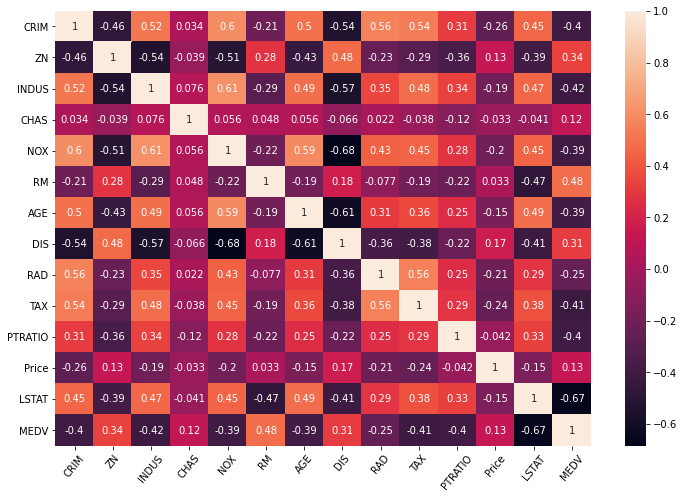

In [35]:
#Since all columns are Numeric we need to study the correlation and we will also look at non Linear relationship
plt.figure(figsize=(12,8))
sns.heatmap(bos.corr(method ='kendall'), xticklabels=bos.corr().columns.values,yticklabels=bos.corr().columns.values, annot=True);
plt.xticks(rotation=50)
plt.show()

In [39]:
#getting the top 5 values
bos.corr(method='kendall').unstack().sort_values().drop_duplicates()[:10]

NOX    DIS     -0.683930
LSTAT  MEDV    -0.668656
AGE    DIS     -0.609836
DIS    INDUS   -0.565137
       CRIM    -0.539878
INDUS  ZN      -0.535468
NOX    ZN      -0.511464
LSTAT  RM      -0.468231
ZN     CRIM    -0.462057
       AGE     -0.429389
dtype: float64

In [77]:
bos.corr().unstack().sort_values().drop_duplicates()[:10]

NOX      DIS     -0.769230
DIS      AGE     -0.747881
LSTAT    MEDV    -0.737663
INDUS    DIS     -0.708027
RM       LSTAT   -0.613808
ZN       AGE     -0.569537
TAX      DIS     -0.534432
INDUS    ZN      -0.533828
ZN       NOX     -0.516604
PTRATIO  MEDV    -0.507787
dtype: float64

In [0]:
#We need to visualize the relationship 

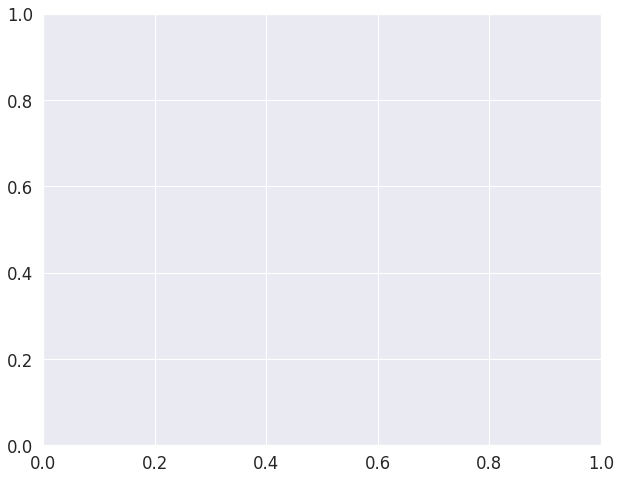

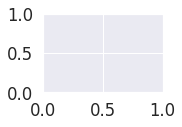

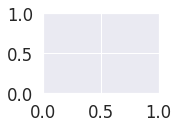

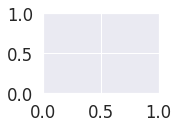

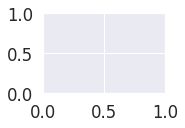

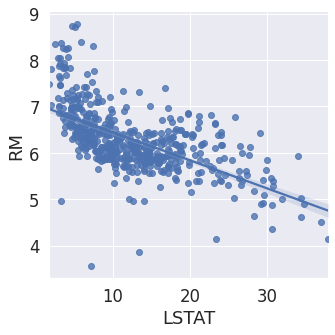

In [84]:
plt.subplot(3,2,1)
sns.lmplot(x="DIS", y="NOX", data=bos,fit_reg = True,ci=90);
plt.subplot(3,2,2)
sns.lmplot(x="DIS", y="AGE", data=bos,fit_reg = True,ci=90);
plt.subplot(3,2,3)
sns.lmplot(x="DIS", y="INDUS", data=bos,fit_reg = True,ci=90);
plt.subplot(3,2,4)
sns.lmplot(x="LSTAT", y="MEDV", data=bos,fit_reg = True,ci=90);
plt.subplot(3,2,5)
sns.lmplot(x="LSTAT", y="RM", data=bos,fit_reg = True,ci=90);

#Now we could see a high negative correlation of DIS & LSTAT variable, we will build a model  considering  both and either of them for better performance

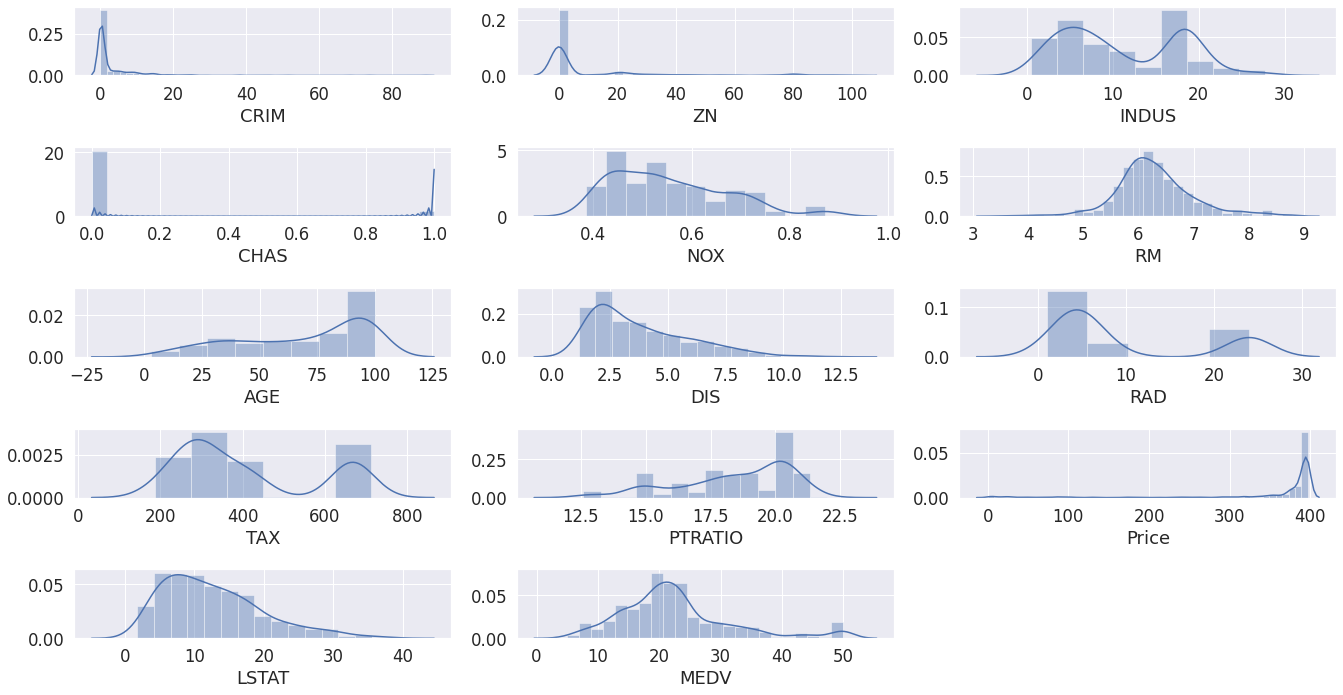

In [45]:
#univariate Anlaysis of all variables
bos.columns
num_cols=[]
for col in bos.select_dtypes(['int64','float64']):
    num_cols.append(col)
sns.set(rc={'figure.figsize':(19,10)},font_scale=1.5)
i = 1
for column in bos[num_cols]:
    plt.subplot(5,3,i)
    sns.distplot(bos[column])
    i = i + 1
                  
plt.tight_layout()
plt.show()

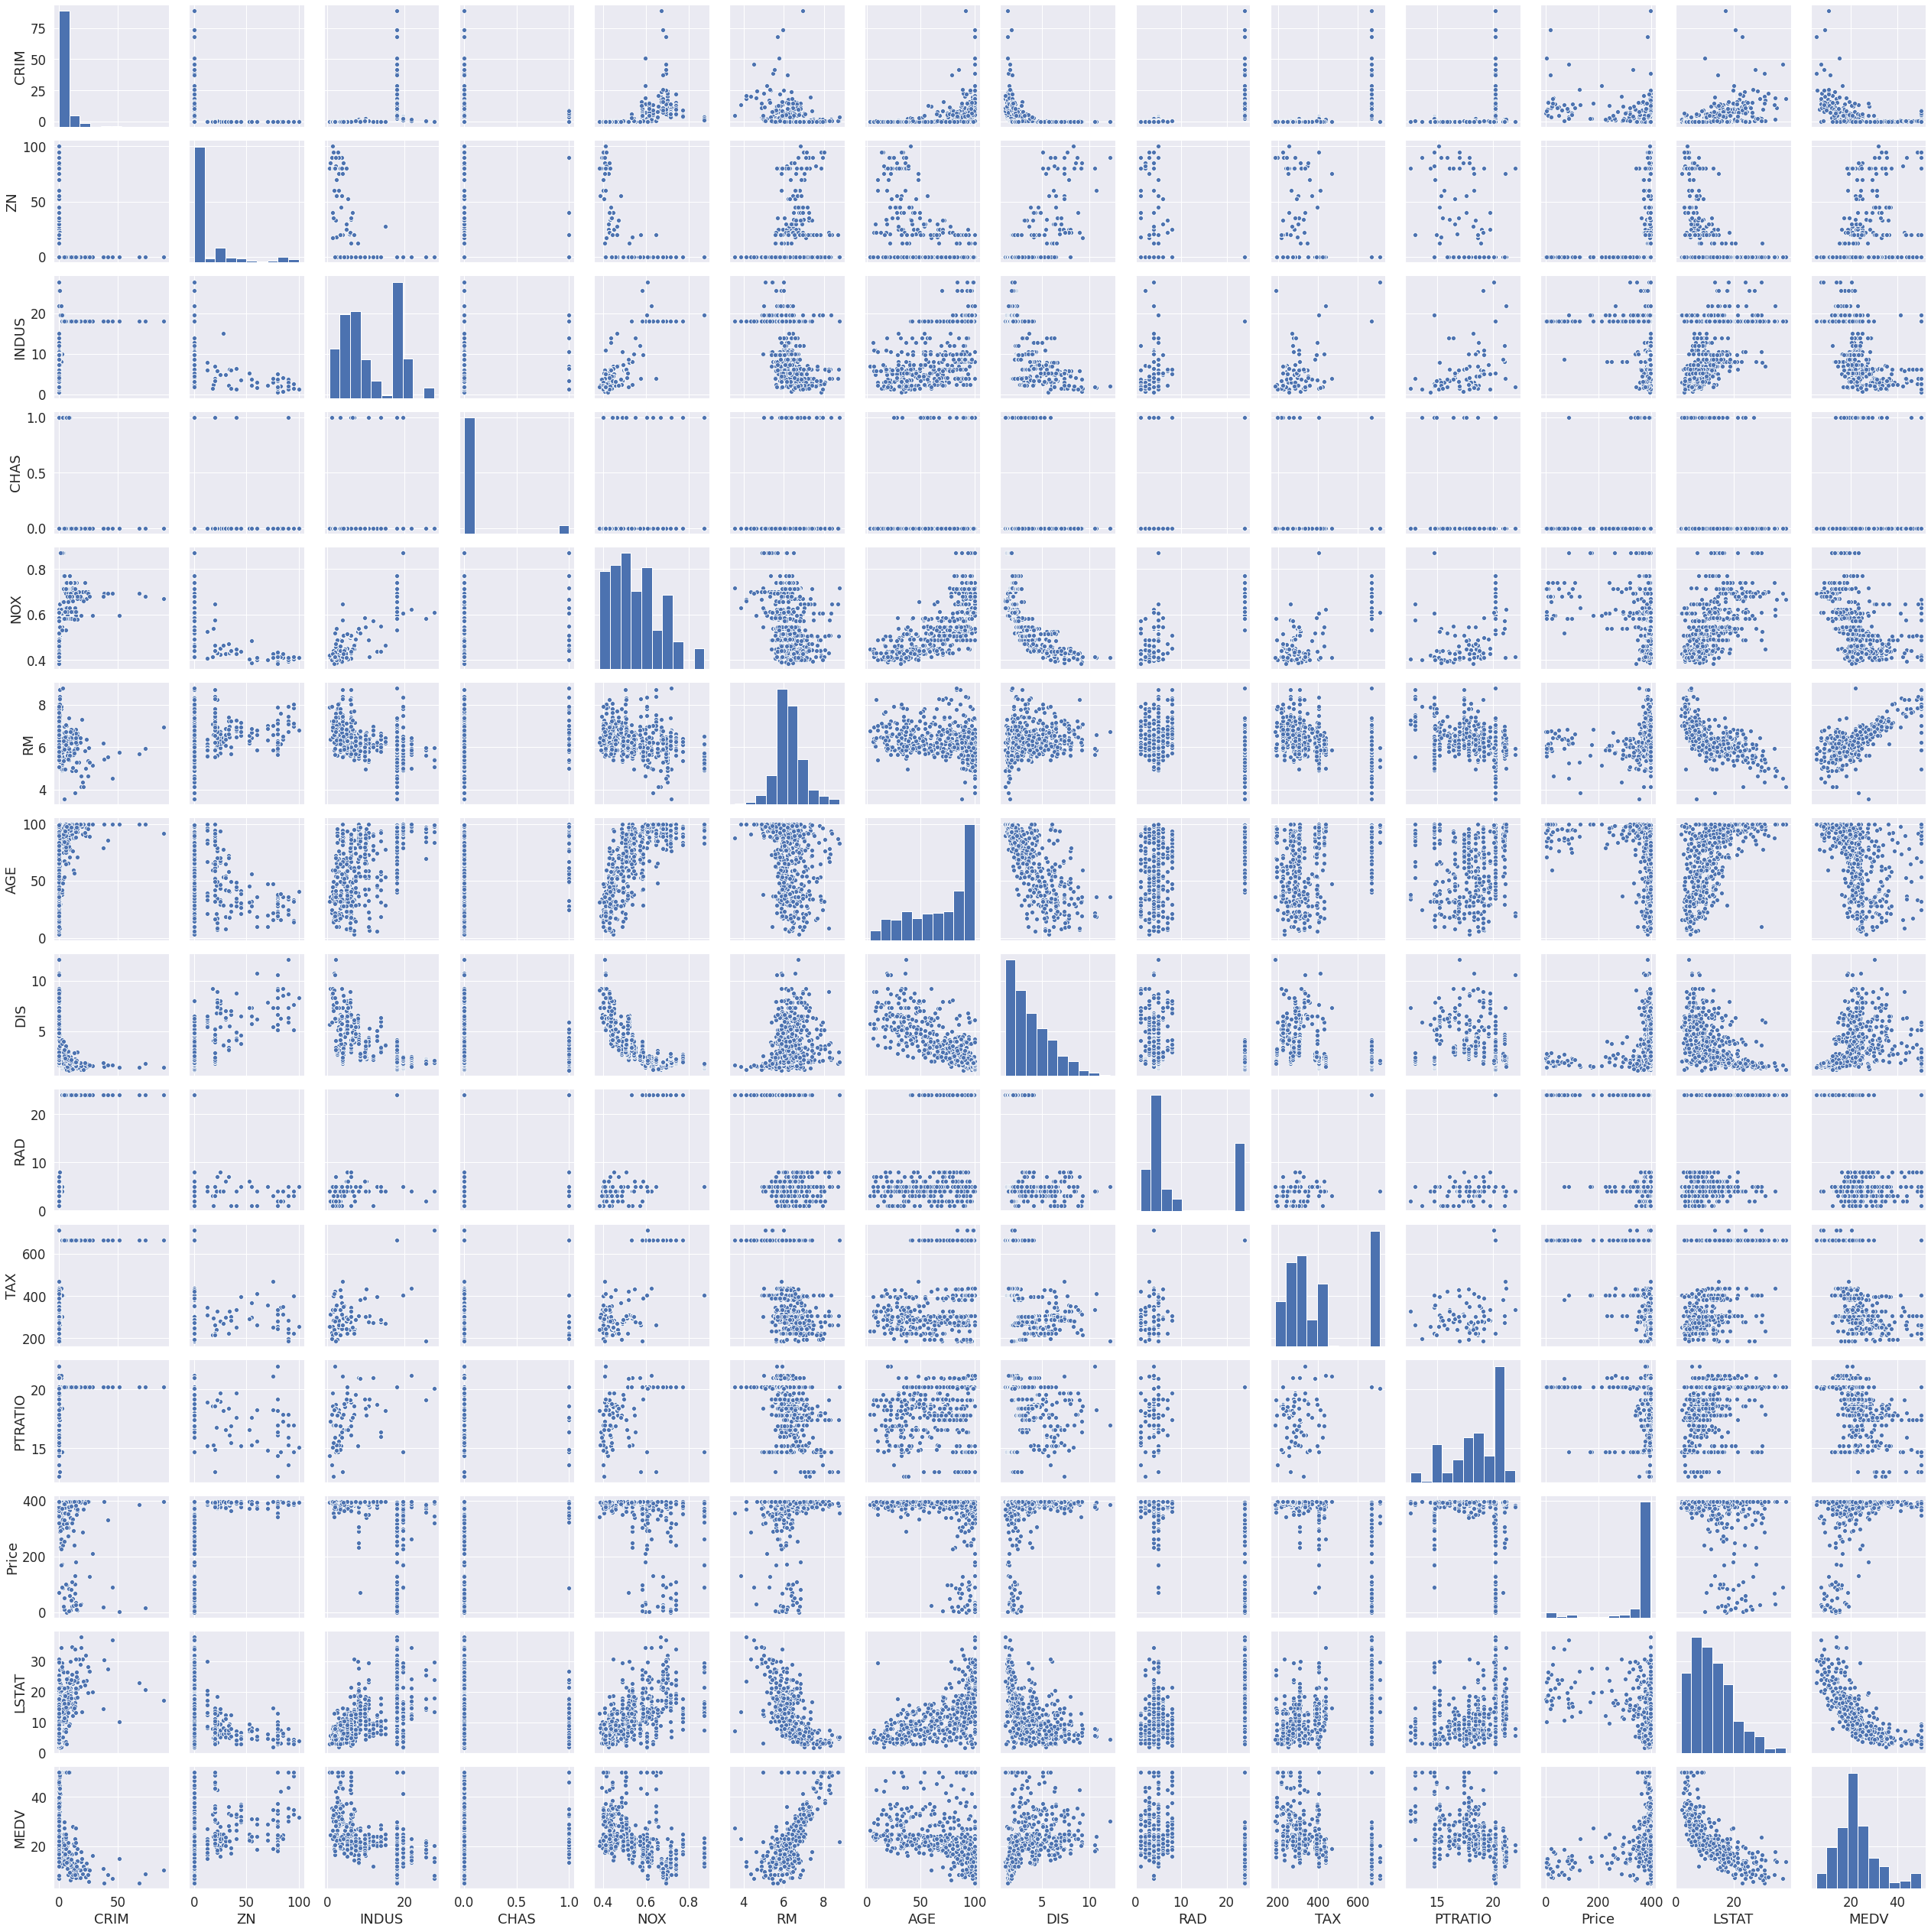

In [61]:
sns.pairplot(bos)

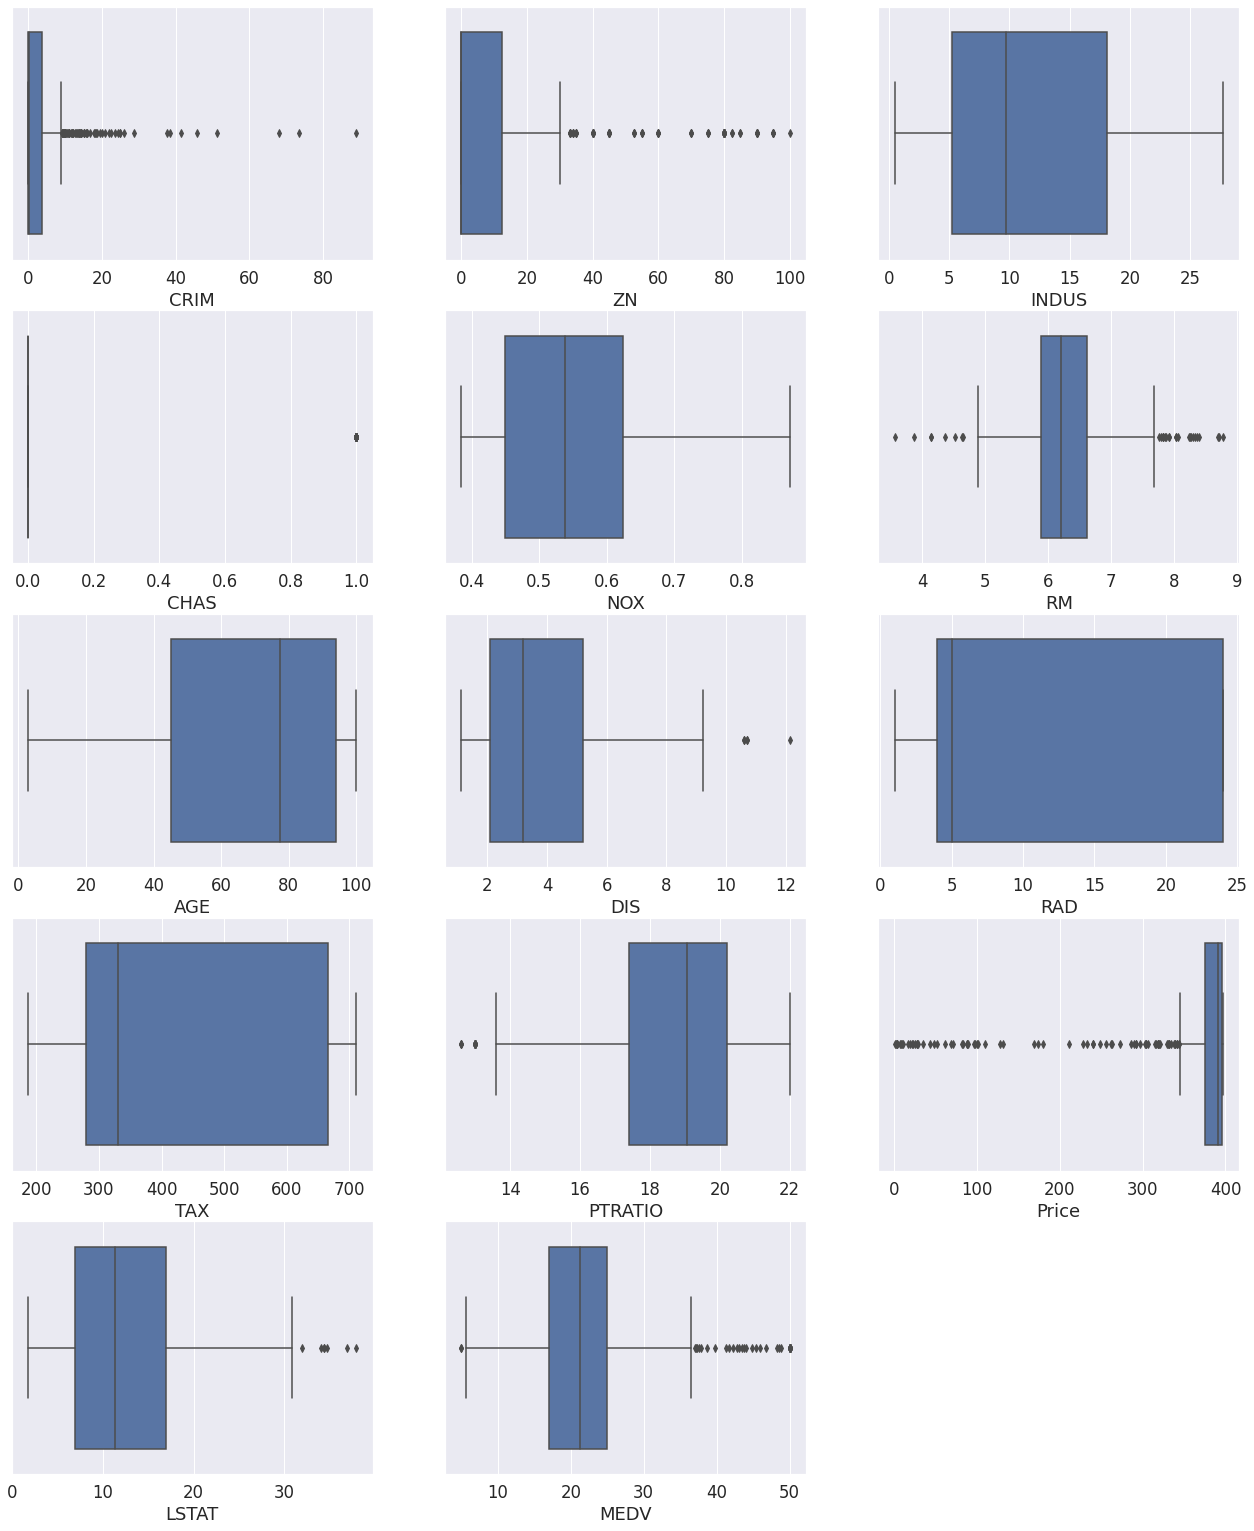

In [60]:
sns.set(rc={'figure.figsize':(22,27)},font_scale=1.5)
i = 1
for col in bos[num_cols]:
    plt.subplot(5,3,i)
    sns.boxplot(bos[col])
    i=i+1
    
plt.tight_layout
plt.show()

#First look into the individual boxplots shows that we have alot of outliers

In [0]:
#bivariate Analysis

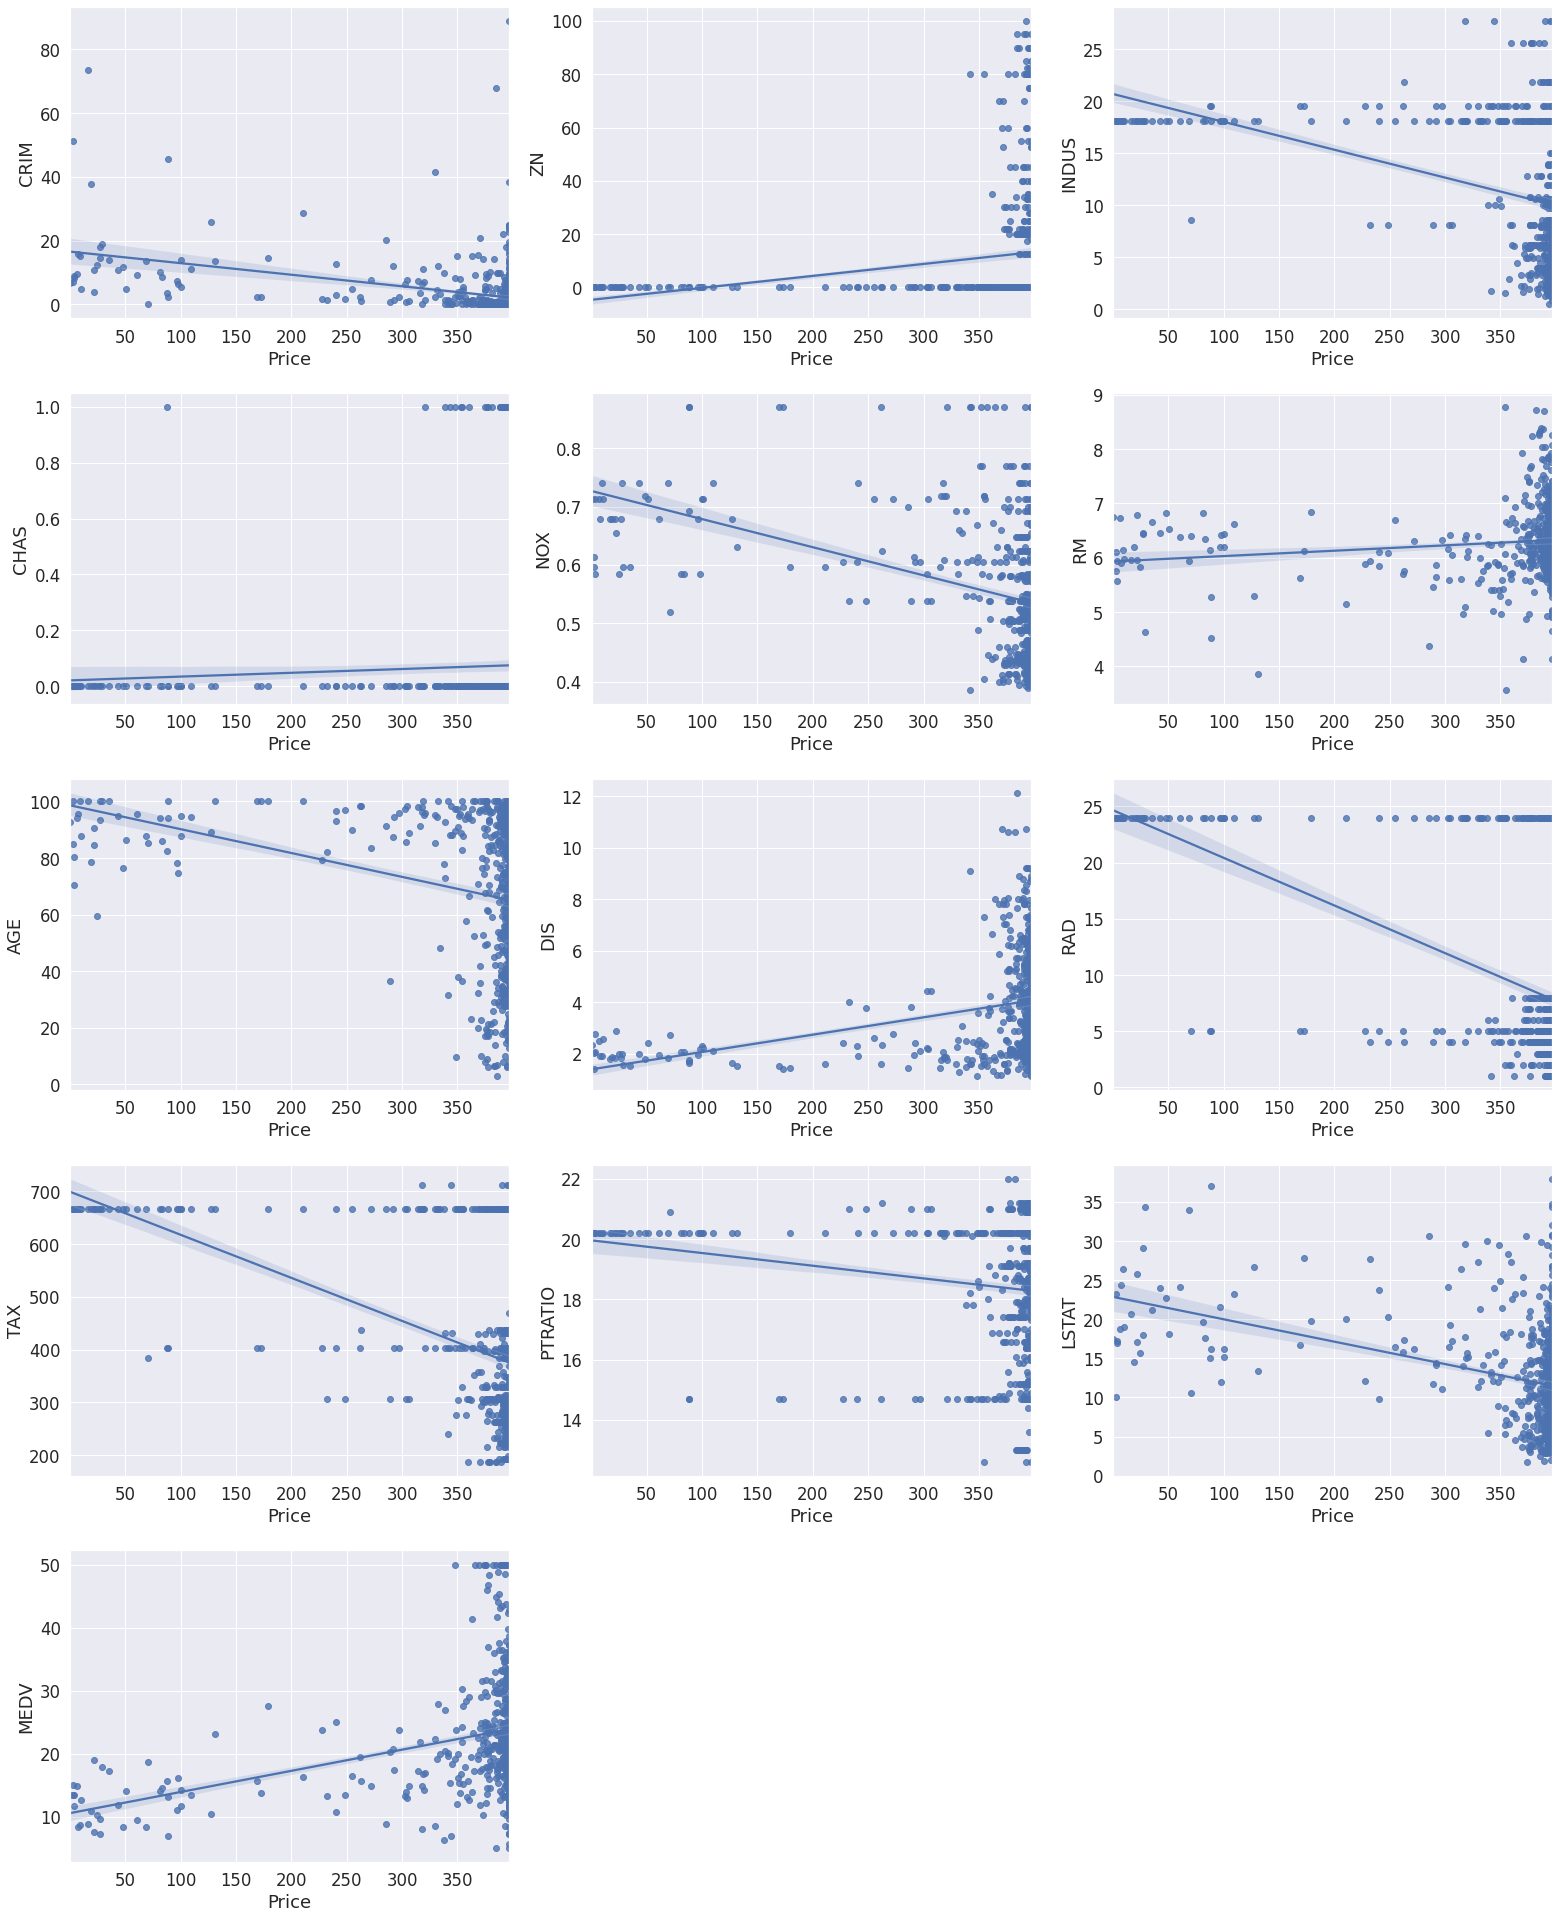

In [74]:
i = 1
for column in num_cols:
  if column!='Price':
      plt.subplot(5,3,i)
      sns.regplot(x = 'Price', y = column ,data  = bos,fit_reg = True,ci =90)
      i = i + 1
                  
plt.tight_layout()
plt.show()

#Drop the Features and do outlier treatment by capping

In [0]:
#clean Outliers by Capping

In [69]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'Price', 'LSTAT', 'MEDV'],
      dtype='object')

In [0]:
#No Categorical columns and hence no One Hot encoding


#Normalizing the Features 

In [0]:
kd_df = bos
# Scaling numerical features
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
#kd_df[cont_features] = minmax.fit_transform(kd_df[cont_features].values)

In [30]:
#test Train split
from sklearn.model_selection import train_test_split
X = bos.drop("Price", axis=1)
Y = pd.DataFrame(bos['Price'])
print(type(Y))
X_train,X_test,Y_train,Y_test = train_test_split(X ,Y ,test_size=0.3,random_state=0)

<class 'pandas.core.frame.DataFrame'>


<class 'pandas.core.series.Series'>
